# Análise Exploratório dos dados

In [76]:
import pandas as pd

train = pd.read_csv('/content/df_train.csv', engine='python', on_bad_lines='skip')
test = pd.read_csv('/content/df_test.csv', engine='python', on_bad_lines='skip')

print("Informações Train \n")
train.info()
print("Quantidade de elementos nulos de Train \n")
print(train.isnull().sum())

print("Informações Test \n")
test.info()
print("Quantidade de elementos nulos de Test \n")
print(test.isnull().sum())

Informações Train 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5986 non-null   object 
 1   Count              5986 non-null   int64  
 2   Country            5986 non-null   object 
 3   State              5986 non-null   object 
 4   City               5986 non-null   object 
 5   Zip Code           5986 non-null   int64  
 6   Lat Long           5986 non-null   object 
 7   Latitude           5986 non-null   float64
 8   Longitude          5986 non-null   float64
 9   Gender             5986 non-null   object 
 10  Senior Citizen     5986 non-null   object 
 11  Partner            5986 non-null   object 
 12  Dependents         5986 non-null   object 
 13  Tenure Months      5986 non-null   int64  
 14  Phone Service      5986 non-null   object 
 15  Multiple Lines     5986 non-null   object 
 16  Inte

Com isso podemos ver que não existe nenhum elemento nulo ou vazio e os tipos de dados de cada variável.
Agora iremos transformar variáveis que deveriam ser númericas porém estão sendo consideradas como object. E verificar os casos únicos de cada coluna.

In [2]:
train.drop(columns=['City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Monthly Charges', 'Tenure Months', 'Total Charges'], inplace=True)
test.drop(columns=['City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Monthly Charges', 'Tenure Months', 'Total Charges'], inplace=True)

for coluna in train.columns:
    unique_values = train[coluna].unique()
    print(f"Valores únicos na coluna '{coluna}': {unique_values}")

for coluna in test.columns:
    unique_values = test[coluna].unique()
    print(f"Valores únicos na coluna '{coluna}': {unique_values}")


Valores únicos na coluna 'CustomerID': ['7590-VHVEG' '3038-PQIUY' '1468-DEFNC' ... '4804-NCPET' '2878-DHMIN'
 '7774-OJSXI']
Valores únicos na coluna 'Count': [1]
Valores únicos na coluna 'Country': ['United States']
Valores únicos na coluna 'State': ['California']
Valores únicos na coluna 'Gender': ['Female' 'Male']
Valores únicos na coluna 'Senior Citizen': ['No' 'Yes']
Valores únicos na coluna 'Partner': ['Yes' 'No']
Valores únicos na coluna 'Dependents': ['No' 'Yes']
Valores únicos na coluna 'Phone Service': ['No' 'Yes']
Valores únicos na coluna 'Multiple Lines': ['No phone service' 'Yes' 'No']
Valores únicos na coluna 'Internet Service': ['DSL' 'No' 'Fiber optic']
Valores únicos na coluna 'Online Security': ['No' 'Yes' 'No internet service']
Valores únicos na coluna 'Online Backup': ['Yes' 'No internet service' 'No']
Valores únicos na coluna 'Device Protection': ['No' 'Yes' 'No internet service']
Valores únicos na coluna 'Tech Support': ['No' 'No internet service' 'Yes']
Valores ún

In [3]:


bins = [2000, 3000, 4000, 5000, 6000, 6500]
labels = [2, 3, 4, 5, 6]

train['CLTV'] = pd.cut(train['CLTV'], bins=bins, labels=labels, right=False)
test['CLTV'] = pd.cut(test['CLTV'], bins=bins, labels=labels, right=False)

train['CLTV'].head()
test['CLTV'].head()

,CLTV
0,3
1,5
2,2
3,5
4,3


Algumas colunas possuem apenas uma variável, não possuindo um impacto na previsão já que todos os valores são iguais. E outras colunas também não possuem um significado importante para o nosso modelo, então elas foram apagadas.

# Codificando variáveis categóricas


In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

colunas_numericas = ['Count', 'CLTV']

colunas_categoricas_train = ['Country', 'State', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']
colunas_categoricas_test = ['Country', 'State', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']

encoder = OneHotEncoder()

transformer_train = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), colunas_numericas),  # Aplica StandardScaler às colunas numéricas
        ('cat', OneHotEncoder(), colunas_categoricas_train)  # Aplica OneHotEncoder às colunas categóricas
    ]
)

transformer_test = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), colunas_numericas),  # Aplica StandardScaler às colunas numéricas
        ('cat', OneHotEncoder(), colunas_categoricas_test)  # Aplica OneHotEncoder às colunas categóricas
    ]
)

train_transformado = transformer_train.fit_transform(train)
test_transformado = transformer_test.fit_transform(test)


train_transformado = pd.DataFrame(train_transformado, columns=transformer_train.get_feature_names_out())
test_transformado = pd.DataFrame(test_transformado, columns=transformer_test.get_feature_names_out())

train_codificado = pd.DataFrame(train_transformado)
test_codificado = pd.DataFrame(test_transformado)

train_codificado.drop(columns=['cat__Churn Label_No'], inplace=True)
train_codificado.info()

test_codificado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 48 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   num__Count                                     5986 non-null   float64
 1   num__CLTV                                      5986 non-null   float64
 2   cat__Country_United States                     5986 non-null   float64
 3   cat__State_California                          5986 non-null   float64
 4   cat__Gender_Female                             5986 non-null   float64
 5   cat__Gender_Male                               5986 non-null   float64
 6   cat__Senior Citizen_No                         5986 non-null   float64
 7   cat__Senior Citizen_Yes                        5986 non-null   float64
 8   cat__Partner_No                                5986 non-null   float64
 9   cat__Partner_Yes                               5986 

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:530: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:530: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:530: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


# Criando o Modelo de Classificação

## Decision Tree

Agora que já foram analisados e limpo é criado um modelo de classificação.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

X_train = train_codificado.drop('cat__Churn Label_Yes', axis=1)
y_train = train_codificado['cat__Churn Label_Yes']

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# Métricas do Modelo:

In [6]:
y_train_pred = model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Acurácia no conjunto de treino: {train_accuracy}')

print("Relatório de classificação no conjunto de treino:")
print(classification_report(y_train, y_train_pred))

print("Matriz de confusão no conjunto de treino:")
print(confusion_matrix(y_train, y_train_pred))

Acurácia no conjunto de treino: 0.9233210825258937
Relatório de classificação no conjunto de treino:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      4409
         1.0       0.89      0.80      0.85      1577

    accuracy                           0.92      5986
   macro avg       0.91      0.89      0.90      5986
weighted avg       0.92      0.92      0.92      5986

Matriz de confusão no conjunto de treino:
[[4258  151]
 [ 308 1269]]


# Fazendo as prediçoes no conjunto de dados Test

In [7]:
churn_predictions = model.predict(test_codificado)

teste = pd.DataFrame(churn_predictions)

resultado = pd.concat([test['CustomerID'], teste], axis=1)
resultado = resultado.rename(columns={0: 'Churn Label'})
resultado['Churn Label'] = resultado['Churn Label'].replace({1.0: 'Yes', 0.0: 'No'})

resultado.to_csv(r'C:\Users\tiago\OneDrive\Área de Trabalho\CIS UNB\2 Periodo TRAINEE\decisionTree.csv', index=False)

print(resultado.head())

   CustomerID Churn Label
0  2189-WWOEW         Yes
1  2446-ZKVAF          No
2  4986-MXSFP          No
3  5868-YWPDW          No
4  9412-GHEEC         Yes


# Utilizando o modelo Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier

X_train #conjunto das features
y_train #labels

model_randomForest = RandomForestClassifier(max_depth=10)


model_randomForest.fit(X_train, y_train)

predictions = model_randomForest.predict(test_codificado)

print(predictions)

teste_randomForest = pd.DataFrame(predictions)

resultado = pd.concat([test['CustomerID'], teste_randomForest], axis=1)
resultado = resultado.rename(columns={0: 'Churn Label'})
resultado['Churn Label'] = resultado['Churn Label'].replace({1.0: 'Yes', 0.0: 'No'})

resultado.to_csv(r'C:\Users\tiago\OneDrive\Área de Trabalho\CIS UNB\2 Periodo TRAINEE\decisionTree.csv', index=False)

print(resultado.head())

y_train_pred_randomForest = model_randomForest.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred_randomForest)
print(f'Acurácia no conjunto de treino: {train_accuracy}')

print("Relatório de classificação no conjunto de treino:")
print(classification_report(y_train, y_train_pred_randomForest))

print("Matriz de confusão no conjunto de treino:")
print(confusion_matrix(y_train, y_train_pred_randomForest))

[1. 0. 0. ... 0. 0. 0.]
   CustomerID Churn Label
0  2189-WWOEW         Yes
1  2446-ZKVAF          No
2  4986-MXSFP          No
3  5868-YWPDW         Yes
4  9412-GHEEC          No
Acurácia no conjunto de treino: 0.8391246241229535
Relatório de classificação no conjunto de treino:
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      4409
         1.0       0.72      0.64      0.68      1577

    accuracy                           0.84      5986
   macro avg       0.80      0.78      0.79      5986
weighted avg       0.83      0.84      0.84      5986

Matriz de confusão no conjunto de treino:
[[4007  402]
 [ 561 1016]]


# Utilizando Validação Cruzada para avaliar o modelo.

In [42]:
import numpy as np
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

X_train #conjunto das features
y_train #labels

model_randomForest = RandomForestClassifier(random_state=42,max_depth=10,max_features=15, ccp_alpha=0.001)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

results = cross_validate(model_randomForest, X_train, y_train, cv=kf, scoring=scoring)

print(f"Accuracy: {results['test_accuracy'].mean()} (+/- {results['test_accuracy'].std()})")
print(f"Precision: {results['test_precision'].mean()} (+/- {results['test_precision'].std()})")
print(f"Recall: {results['test_recall'].mean()} (+/- {results['test_recall'].std()})")
print(f"F1 Score: {results['test_f1'].mean()} (+/- {results['test_f1'].std()})")

Accuracy: 0.7976937334990231 (+/- 0.005274070498841006)
Precision: 0.6457174377729845 (+/- 0.01536800800652131)
Recall: 0.5155635925256179 (+/- 0.023081926162601428)
F1 Score: 0.5729336293061935 (+/- 0.01430673055692024)


# Utilizando o modelo Naive Bayes

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

X_train1, X_test, y_train1, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Treinar o modelo
model_NB = BernoulliNB(alpha=2)
model_NB.fit(X_train1, y_train1)

# Fazer previsões
y_pred = model_NB.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred))

print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))

predictionsNB = model_NB.predict(test_codificado)

print(predictionsNB)

teste_NB = pd.DataFrame(predictionsNB)

resultado = pd.concat([test['CustomerID'], teste_NB], axis=1)
resultado = resultado.rename(columns={0: 'Churn Label'})
resultado['Churn Label'] = resultado['Churn Label'].replace({1.0: 'Yes', 0.0: 'No'})

resultado.to_csv(r'C:\Users\tiago\OneDrive\Área de Trabalho\CIS UNB\2 Periodo TRAINEE\decisionTree.csv', index=False)

Acurácia: 0.74
Matriz de Confusão:
[[943 385]
 [ 78 390]]
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.92      0.71      0.80      1328
         1.0       0.50      0.83      0.63       468

    accuracy                           0.74      1796
   macro avg       0.71      0.77      0.72      1796
weighted avg       0.81      0.74      0.76      1796

[1. 1. 0. ... 0. 1. 0.]


# Utilizando o modelo SVM

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)


modelSVM = SVC(kernel='linear', C=1.0, probability= True)

modelSVM.fit(X_train_scaled, y_train2)

y_pred2 = modelSVM.predict(X_test_scaled)


accuracy = accuracy_score(y_test2, y_pred2)
print(f'Acurácia: {accuracy:.2f}')

print('Matriz de Confusão:')
print(confusion_matrix(y_test2, y_pred2))

print('Relatório de Classificação:')
print(classification_report(y_test2, y_pred2))

predictionsSVM = modelSVM.predict(test_codificado)

print(predictionsSVM)

teste_NB = pd.DataFrame(predictionsSVM)

resultado = pd.concat([test['CustomerID'], teste_NB], axis=1)
resultado = resultado.rename(columns={0: 'Churn Label'})
resultado['Churn Label'] = resultado['Churn Label'].replace({1.0: 'Yes', 0.0: 'No'})

resultado.to_csv(r'C:\Users\tiago\OneDrive\Área de Trabalho\CIS UNB\2 Periodo TRAINEE\decisionTree.csv', index=False)

Acurácia: 0.81
Matriz de Confusão:
[[1163  165]
 [ 184  284]]
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1328
         1.0       0.63      0.61      0.62       468

    accuracy                           0.81      1796
   macro avg       0.75      0.74      0.74      1796
weighted avg       0.80      0.81      0.80      1796

[0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


# Respondendo as perguntas

1) Algumas cidade possuem uma taxa de 100% de Churn porem um número pequeno de casos. Ao filtrar para cidades com pelo menos 50 clientes, podemos ver que as cidades com maior taxa de Churn são respectivamente: Los Angeles, San Diego e San Jose.
O Churn é mais prevalente em clientes novos, especialmente entre 0 e 10 meses, com uma taxa de quase 50%.
E os serviços menos utilizados são Online Security (1696), Tech Support (1743) e Online Backup (2044)

2) Os resultados obtidos com o modelo RandomForest forem melhores no geral do que o modelo DecisionTree. Apesar do modelo DecisionTree possuir métricas melhores, ele perfomou pior no cojunto de Test, provavelmente por conta de Overfitting do modelo. As métricas de cada um:

    DecisionTree:
    Acurácia no conjunto de treino: 0.9233210825258937
    Relatório de classificação no conjunto de treino:
                  precision    recall  f1-score   support

            0.0       0.93      0.97      0.95      4409
            1.0       0.89      0.80      0.85      1577

        accuracy                           0.92      5986
      macro avg       0.91      0.89      0.90      5986
    weighted avg       0.92      0.92      0.92      5986

    Matriz de confusão no conjunto de treino:
    [[4258  151]
    [ 308 1269]]


    RandomForest:
    Acurácia no conjunto de treino: 0.8391246241229535
    Relatório de classificação no conjunto de treino:
                  precision    recall  f1-score   support

            0.0       0.88      0.91      0.89      4409
            1.0       0.72      0.64      0.68      1577

        accuracy                           0.84      5986
      macro avg       0.80      0.78      0.79      5986
    weighted avg       0.83      0.84      0.84      5986

    Matriz de confusão no conjunto de treino:
    [[4007  402]
    [ 561 1016]]


3) Utilizando Validação Cruzada para avaliar o desempenho do modelo RandomForest, foi-se obtida as seguintes métricas:

    Accuracy: 0.7976937334990231 (+/- 0.005274070498841006)
    Precision: 0.6457174377729845 (+/- 0.01536800800652131)
    Recall: 0.5155635925256179 (+/- 0.023081926162601428)
    F1 Score: 0.5729336293061935 (+/- 0.01430673055692024)

Validação Cruzada K-Fold: Os dados são divididos em K partes, e uma delas é usada pra testar o modelo enquanto o resto usa pra treinar o modelo. Ele é repetido uma vez para cada K parte. Ele pode ser aplicado para reduzir a variabilidade.

Validação Cruzada Leave-One-Out (LOO): Nesse o K é igual o número total de elemento, e apenas 1 é usado pra teste, todos os outros são usados para treino. Sua aplicação é para conjunto de dados pequenos onde se deseja usar mais dados para treino.

Validação Cruzada Estratificada: Parecida com a validação cruzada K-Fold onde a divisão dos dados é feita de maneira que cada fold tem a mesma proporção de classes como o conjunto de dados original. Sua aplicação é útil para problemas de classificação desbalanceada.

4) A redução de dimensionalidade como o PCA afeta de maneira positiva os modelos de predição de Churn. Ela reduz um dos principais problemas encontrados até agora que é o Overfitting, onde o modelo possui um ótimo resultado nos dados de treine porém desempenha mal nos dados de teste.

               count_no  count_yes  total  taxa_churn
City                                                 
Los Angeles         189         81    270    0.300000
San Diego            91         39    130    0.300000
San Jose             68         26     94    0.276596
San Francisco        66         25     91    0.274725
Fresno               43         15     58    0.258621
Long Beach           39         13     52    0.250000
Sacramento           68         22     90    0.244444


<ipython-input-118-81da9a67f1db>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempo_churn.loc[:, 'Intervalo 10 Meses'] = (tempo_churn['Tenure Months'] // 10) * 10


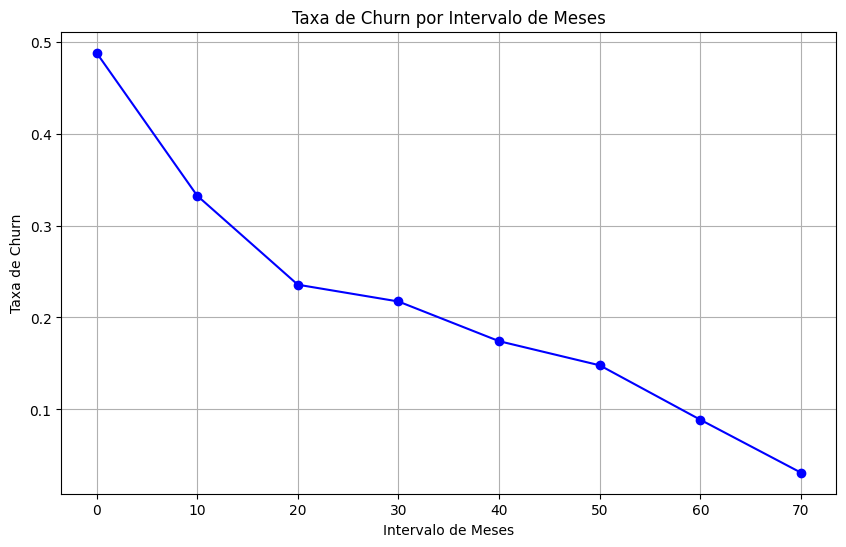

Quantidade de usos de Internet Service: 4668
Internet Service        0
Online Security      1696
Tech Support         1743
Online Backup        2044
Device Protection    2056
Streaming TV         2274
Streaming Movies     2321
Multiple Lines       2507
Phone Service        5401
dtype: int64


In [118]:
cidade_churn = train[['City', 'Churn Label']]

contagem_churn = cidade_churn.groupby('City')['Churn Label'].value_counts().unstack(fill_value=0)
contagem_churn.columns = ['count_no', 'count_yes']
contagem_churn['total'] = contagem_churn['count_no'] + contagem_churn['count_yes']
contagem_churn['taxa_churn'] = contagem_churn['count_yes'] / contagem_churn['total']
contagem_churn_filtrada = contagem_churn[contagem_churn['total'] > 50]
cidades_ordenadas = contagem_churn_filtrada.sort_values(by=['taxa_churn', 'total'], ascending=[False, False])
print(cidades_ordenadas)

tempo_churn = train[['Tenure Months', 'Churn Label']]
tempo_churn.loc[:, 'Intervalo 10 Meses'] = (tempo_churn['Tenure Months'] // 10) * 10
contagem_churn = tempo_churn.groupby('Intervalo 10 Meses')['Churn Label'].value_counts().unstack(fill_value=0)
contagem_churn.columns = ['Count_No', 'Count_Yes']
contagem_churn['Total'] = contagem_churn['Count_No'] + contagem_churn['Count_Yes']
contagem_churn['Taxa_Churn_Yes'] = contagem_churn['Count_Yes'] / contagem_churn['Total']

plt.figure(figsize=(10, 6))
plt.plot(contagem_churn.index, contagem_churn['Taxa_Churn_Yes'], marker='o', linestyle='-', color='b')
plt.xlabel('Intervalo de Meses')
plt.ylabel('Taxa de Churn')
plt.title('Taxa de Churn por Intervalo de Meses')
plt.grid(True)
plt.show()

servicos = train[['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']]
contagem_servicos = servicos.apply(lambda x: x.value_counts().get('Yes', 0))
servicos_menos_utilizados = contagem_servicos.sort_values(ascending=True)
contagem_no = servicos['Internet Service'].value_counts().get('No', 0)
print(f'Quantidade de usos de Internet Service: {5986 - contagem_no}')
print(servicos_menos_utilizados)